In [1]:
import numpy as np
class KMeans:
    
    def __init__(self, n_clusters=4):
        self.K = n_clusters
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

In [ ]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## loading data
three_globs = pd.read_csv('/Users/tjmask/Desktop/Semester2/DataMining/HW1/hw1/Homework_1/Datasets/three_globs.csv')
three_globs_df = three_globs
three_globs = np.array(three_globs)

In [ ]:
three_globs_df['cluster'] = 0
m1 = np.where(three_globs_df.index=='GLOB_1')[0]
m2 = np.where(three_globs_df.index=='GLOB_2')[0]
m3 = np.where(three_globs_df.index=='GLOB_3')[0]
three_globs_df['cluster'][m1]=1 
three_globs_df['cluster'][m2]=2
three_globs_df['cluster'][m3]=3

In [54]:
a = KMeans(n_clusters=3).fit(three_globs)
b = np.array(three_globs_df['cluster'])
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

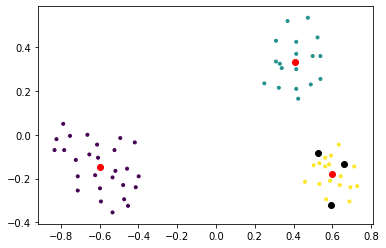

In [62]:
plt.scatter(three_globs[:, 0], three_globs[:, 1], marker='.', c = b)
plt.scatter(a.centroids[:, 0], a.centroids[:,1], c='r')
plt.scatter(a.intial_centroids[:, 0], a.intial_centroids[:,1], c='k')
plt.show()

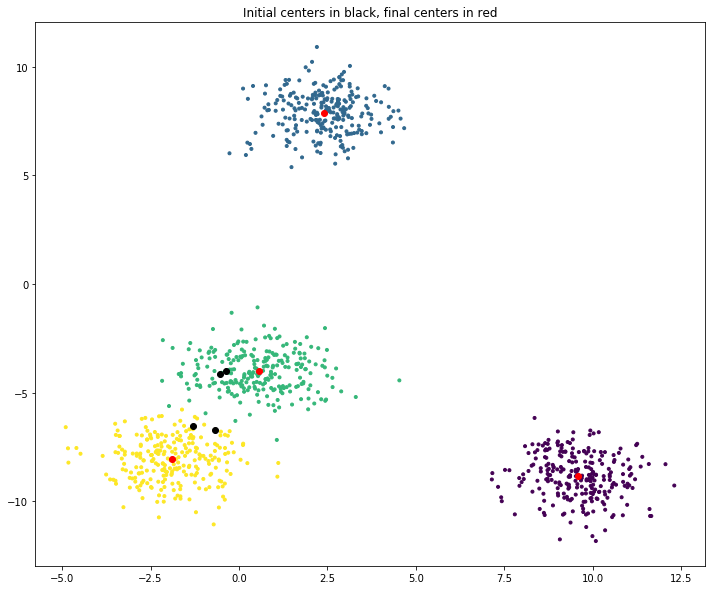

In [23]:
plt.figure(figsize=(12,10))
plt.title("Initial centers in black, final centers in red")
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r')
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k')
plt.show()

array([[-7.8803e-01,  4.9875e-02],
       [-6.6334e-01, -2.2204e-16],
       [-7.5312e-01, -4.9875e-03],
       [-4.9377e-01, -1.4963e-02],
       [-8.2294e-01, -1.9950e-02]])

Automatically created module for IPython interactive environment


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


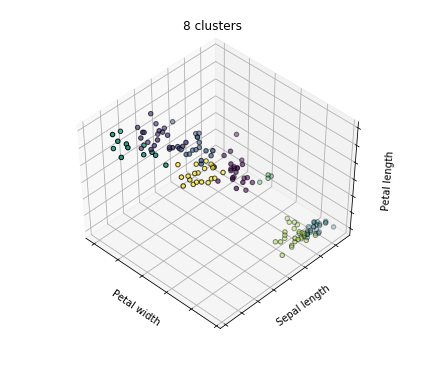

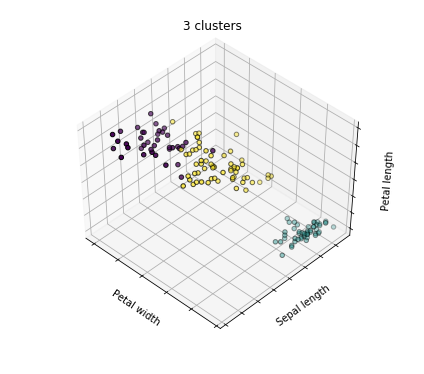

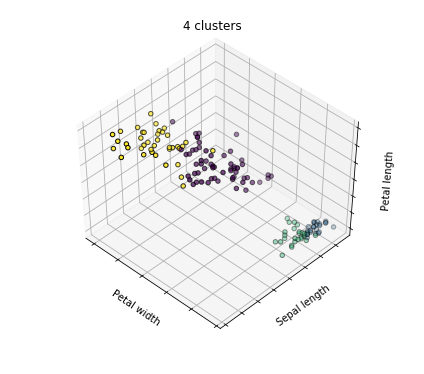

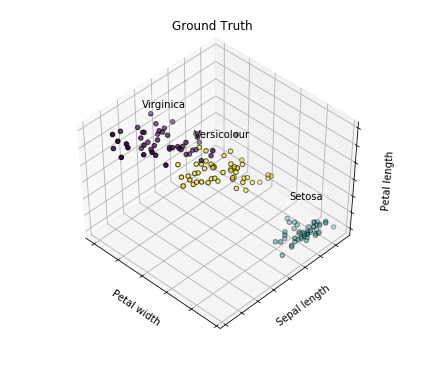

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_4', KMeans(n_clusters=4))]

fignum = 1
titles = ['8 clusters', '3 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

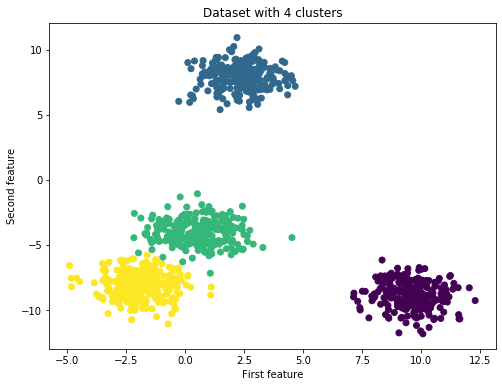

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, n_samples=1000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4).fit(X)

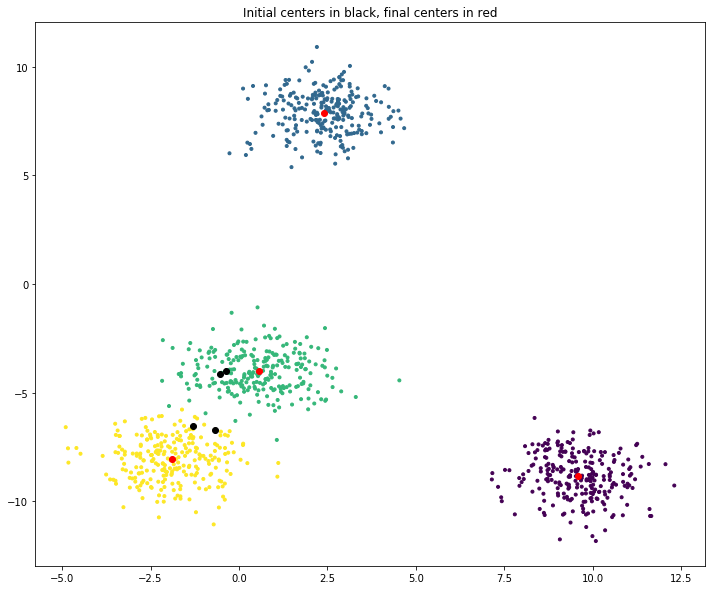

In [7]:
plt.figure(figsize=(12,10))
plt.title("Initial centers in black, final centers in red")
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r')
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k')
plt.show()

In [13]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet      ##matrix differences
    sqDiffMat = diffMat**2                       ##square the differences
    sqDistances = sqDiffMat.sum(axis=1)
    sortedDistIndicies = sqDistances.argsort()   ##sort 
    classCount={}       
    for i in range(k):   ##sort dictionary，label is the key，value will be  K-means
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    print("dictionary",sortedClassCount)
    return sortedClassCount[0][0]

In [14]:
group,labels=createDataSet()
result=classify0([0.5,0.5], group, labels, 3)
print(result) 

dictionary [('B', 2), ('A', 1)]
B
